# Data transformation - 영국시장의 중고 자동차 가격 데이터 다루기[프로젝트]
#### 기본 방향
- "중고차 가격 예측 모델"을 가정한 데이터 전처리

<br>

#### 파생할 수 있는 클러스터링은?
- 차종별 구매 성향 분석
  - 국가별로 인기가 많은 브랜드와 그 차종의 특징을 분석한다면, 고객 선호도를 파악할 수 있을 것.
  - 국가에 따라 -> 연비가 좋은 차(배기량 등급이 높은 차)를 선호할 수도 있고, 엔진이 좋은 차를 선호할 수도 있고..그 선호도의 방향이 다양할 것이기 때문.
  - 이를 분석할 수 있다면 **국가별 맞춤형 마케팅 전략**으로 활용할 수 있을 것으로 기대.

## 1. 데이터 불러오기

In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# 데이터 불러오기
cars_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1031data/cars.csv')
brand_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1031data/brand.csv')

In [ ]:
# 데이터 특성 파악하기 - cars
cars_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [ ]:
# 데이터 특성 파악하기 - brand

brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


## 2. 데이터를 합칠 기준 설정하기
- `title`을 표준화하여 새로운 컬럼을 생성하고, 그 새 컬럼을 기준으로 합치는 것이 가장 좋은 선택일 것으로 보임.
  - title 컬럼을 공통으로 가지고 있고, 같은 차종인 경우도 조금 다르게 표시되어 있는 경우가 있으니 그걸 표준화해부면 될 것 같음.

# 3. 데이터 표준화하기
- cars.csv
  - `Service history`의 데이터 표기가 다른 경우를 처리하기 -> replace로 모두 소문자로 변경 및 통일
    - 대소문자, 공백으로 인해서 다르게 보이는 경우가 있음.

<br>

- 공통
  - `title`을 이용해 `Brand` 컬럼 생성하기
    - cars 데이터에서 브랜드명 추출 -> title이 brand 데이터와 같이 표현되도록 표준화해주는 과정
    - 모두 소문자로 바꿔 병합 시에 하나의 차종이 하나의 표현으로 보일 수 있도록 하기 위함.
    - `Brand` 컬럼을 기준으로 병합을 진행!

In [ ]:
# Service history 표준화

cars_df['Service history'] = cars_df['Service history'].str.strip().str.lower().replace({
    'no': 'no', 'yes': 'yes', 'unknown': 'unknown'
})

In [ ]:
cars_df['Service history']

,Service history
0,NaN
1,full
2,NaN
3,full
4,NaN
...,...
3682,NaN
3683,NaN
3684,NaN
3685,full


In [ ]:
# title 컬럼에서 Brand 컬럼 생성 -> 내용은 모두 소문자로

cars_df['Brand'] = cars_df['title'].str.split().str[0].str.lower()

In [ ]:
cars_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,full,vauxhall
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,full,mini
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall


In [ ]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


# 4. 데이터 병합하기
- cars_df와 brand_df를 Brand를 기준으로 병합 진행
  - cars_df는 Brand 컬럼 기준
  - brand_df는 title 컬럼 기준

- cars_df가 더 핵심 데이터이기 때문에 Left Join을 수행
  - cars_df를 모두 포함하기 위한 목적

- 불필요하게 생기는 열을 제거
  - title이라는 공통된 이름의 컬럼이 있기 때문에, 병합을 하게 되면 `title_y`라는 이름의 컬럼이 새로 만들어짐.
  - 필요하지 않기 때문에 드랍해줘야 함.
  - Brand 열도 cars_df에 이미 있기도 한데다, 병합하고 난 후에는 크게 필요하지 않기 때문에 드랍하는 것으로 결정

In [ ]:
# 데이터 병합 및 필요하지 않은 열 드랍하기
merged_df = pd.merge(cars_df, brand_df, left_on='Brand', right_on='title', how='left')
merged_df = merged_df.drop(columns=['title_y', 'Brand'])

In [ ]:
merged_df.head()

,title_x,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom


- 확인해보니, title 컬럼이 title_x로 표현되었음 -> 다시 title로 컬럼명 변경!

In [ ]:
merged_df = merged_df.rename(columns={'title_x': 'title'})

In [ ]:
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom


# 5. 카테고리형 변수를 숫자 형태로 변환하기
- One-Hot Encoding 적용 후, 기존의 컬럼은 지우고 인코딩된 데이터로 채우기
  - 사이킷런의 OneHotEncoder를 사용하는 것을 고려했으나, 모든 문자열의 값을 숫자형 값으로 변환한 다음 사용해야 한다는 단점이 있는 것으로 파악
  - 또한, 결과가 데이터 프레임이 아닌 넘파이 배열로 나오기 때문에 또다시 데이터 프레임으로 변경해줘야하는 불필요한 작업을 해야함.
  - 기존의 판다스 One-Hot Encoding API인 `get_dummies()`를 사용하는 것으로 결론.

In [ ]:
encoded_df = pd.get_dummies(merged_df, columns=['Engine', 'Emission Class'], drop_first=True)

- 왜 구글 코랩에서는 True, False로 나올까?
  - pandas 업데이트로 인해 값이 True, False로 변경된 이슈가 있었음.
  - [원핫 인코딩에서 0,1이 아니고 False,True가 나옴](https://www.inflearn.com/community/questions/1240327/%EC%9B%90%ED%95%AB-%EC%9D%B8%EC%BD%94%EB%94%A9%EC%97%90%EC%84%9C-0-1%EC%9D%B4-%EC%95%84%EB%8B%88%EA%B3%A0-false-true%EA%B0%80-%EB%82%98%EC%98%B4?srsltid=AfmBOoqvbTbugnjggmGY1xYu8SHPjFPOMyjd-eqlOgTRl9YWyOKHO9sD)

In [ ]:
encoded_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Gearbox,Doors,Seats,...,Engine_4.4L,Engine_4.8L,Engine_5.0L,Engine_5.5L,Engine_6.3L,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,Manual,5.0,5.0,...,False,False,False,False,False,False,False,False,False,True
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,Manual,3.0,5.0,...,False,False,False,False,False,False,False,True,False,False
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,Manual,5.0,5.0,...,False,False,False,False,False,False,False,False,True,False
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,Manual,3.0,4.0,...,False,False,False,False,False,False,False,True,False,False
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,Manual,5.0,5.0,...,False,False,False,False,False,False,False,False,True,False


# 6. 결측치 처리하기
- `Service history`의 변수 결측치 : Unknown으로 채우기
  - "중고차"라는 차량의 특성 고려
    - 서비스 이력은 중고차의 경우, 운이 좋다면 한번도 없을 수 있겠지만 대부분의 경우 최소 1번 이상은 있을 것으로 예상됨.
    - 그렇기 때문에 결측치가 ➡️ 이력 없음을 의미하지 않을 확률이 더 높을 것으로 예상하고 값을 유지하는 것으로 결정

In [ ]:
merged_df['Service history'] = merged_df['Service history'].fillna('Unknown')

In [ ]:
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,full,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,United Kingdom


## 결측치 변수의 일정 개수에 대한 기준 선정하기
- 결측치 비율을 먼저 확인

In [ ]:
# 결측치 비율 확인
merged_df.isna().mean()

,0
title,0.000000
Price,0.000000
Mileage(miles),0.000000
Registration_Year,0.000000
Previous Owners,0.382696
Fuel type,0.000000
Body type,0.000000
Engine,0.012205
Gearbox,0.000000
Doors,0.006781


## 상관관계 분석으로 결측치 기준 세워보기
- 결측치를 일정 **비율**로 제거할건지, 일정 **개수**로 제거할건지 기준을 세우기
  - price와 Registration_year의 상관관계가 가장 높음(0.72)
  - 다른 경우도 0.5이상의 상관관계를 가진 컬럼들이 꽤 많이 보이기 때문에 개수로 결측치를 제거하는 것은 컬럼 간 상관관계와는 관련없이 임의로 지우는 것에 가깝기 때문에 기준이 모호해 보임.

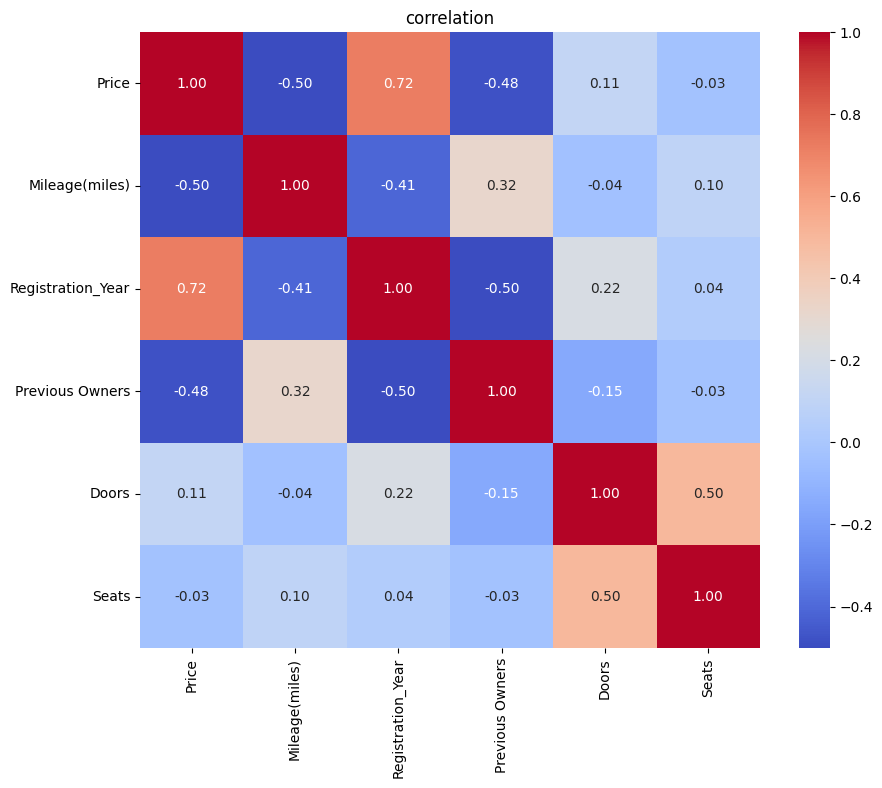

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수들로 분석
numeric_merged_df = merged_df.select_dtypes(include='number')

# 수치형 변수들 간의 상관 행렬 계산
correlation_matrix = numeric_merged_df.corr()

# 상관 행렬을 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation')
plt.show()

- 특히 결측치 비율이 높고, 개수가 많은 `Previous Owners`에 대한 컬럼의 데이터를 대체할 것인지 제거할 것인지 고민.
  - 중고차를 매입하는 사람의 입장에서, 앞선 차주가 얼마나 많았는지 여부는 중요할 것이라고 생각.
  - 결측치가 많다고 해서 컬럼 자체를 삭제하는 것은 무리가 있음.

- Previous Owners의 분포를 살펴보기.
  - 추후 스케일링 단계에서 StandardScaler를 사용할 예정이기 때문에, 정규 분포 형태의 데이터가 필요.
  - 즉, 평균값으로 대체하는 것이 가장 나을 것으로 판단.
  - 그 외의 나머지 결측치는 우선 고려하지 않음.
    - 다른 수치에 비해 결측치가 많이 낮은 상황이기는 하나, 제거하기에는 의미가 있는 데이터가 있을 것으로 예상.
    - 추후, 가능하다면 -> 최빈값으로 대체할 예정(현 단계에서는 처리하지 않음)


In [ ]:
# 데이터 타입 살펴보기
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    3687 non-null   object 
 13  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 403.4+ KB


In [ ]:
# Previus Owners 고유값 살펴보기
merged_df['Previous Owners'].value_counts()

,count
Previous Owners,
2.0,594
1.0,523
3.0,475
4.0,360
5.0,208
6.0,60
7.0,39
8.0,12
9.0,5


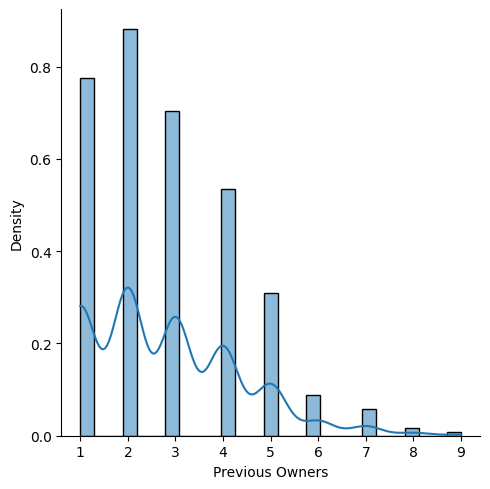

In [ ]:
# 기존 Previous Owners 그래프 시각화해서 보기
sns.displot(merged_df['Previous Owners'], kde=True, stat="density")

- Previous Owners의 경우 우측 편향의 성질을 가지고 있고, 정규 분포의 형태를 띄기 위해서는 평균값으로 대체하는 것이 가장 합리적인 방안.
  - min, max 등의 극단적인 값으로 처리하면 이상치로 분류될 가능성이 있다고 생각했기 때문!

<ipython-input-296-6efbc4c07994>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Previous Owners'].fillna(merged_df['Previous Owners'].mean(), inplace=True)


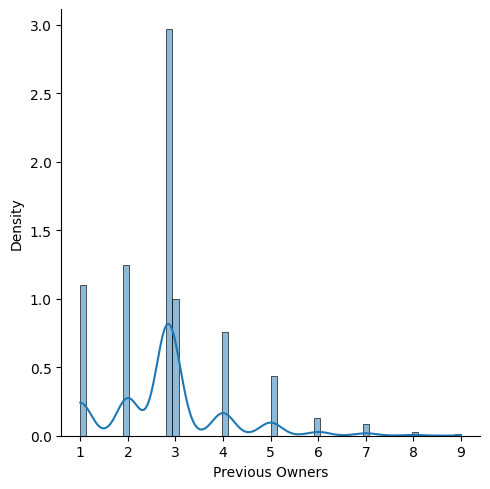

In [ ]:
# 결측치를 평균값으로 대체
merged_df['Previous Owners'].fillna(merged_df['Previous Owners'].mean(), inplace=True)
sns.displot(merged_df['Previous Owners'], kde=True, stat="density")

In [ ]:
# Previous Owners의 결측치 비율 다시 확인
merged_df.isna().mean()

,0
title,0.000000
Price,0.000000
Mileage(miles),0.000000
Registration_Year,0.000000
Previous Owners,0.000000
Fuel type,0.000000
Body type,0.000000
Engine,0.012205
Gearbox,0.000000
Doors,0.006781


- 문제에서는, 결측치 변수가 일정 개수 이상 포함된 데이터를 제거하라고 나와있음.
  - 중고차를 매입하는 입장에서 고려했을 때, Previous Owners를 제외한 결측치 비율이 나오는 데이터들은 결측치가 무의미한 값을 의미한다고 보기 어렵다는 판단.
  - 따라서, 행을 기준으로 해서 2~5개의 범주를 잡고, 몇 개 이상의 결측치가 있는 행을 제거할건지 결정.





In [ ]:
# 결측치가 2개 이상인 행 개수 보기
missing_2_rows = cars_df[cars_df.isnull().sum(axis=1) >= 2]
num_missing_2_rows = len(missing_2_rows)
num_missing_2_rows

1316

In [ ]:
# 결측치가 3개 이상인 행 개수 보기
missing_3_rows = cars_df[cars_df.isnull().sum(axis=1) >= 3]
num_missing_3_rows = len(missing_3_rows)
num_missing_3_rows

79

In [ ]:
# 결측치가 4개 이상인 행 개수 보기
missing_4_rows = cars_df[cars_df.isnull().sum(axis=1) >= 4]
num_missing_4_rows = len(missing_4_rows)
num_missing_4_rows

61

In [ ]:
# 결측치가 5개 이상인 행 개수 보기
missing_5_rows = cars_df[cars_df.isnull().sum(axis=1) >= 5]
num_missing_5_rows = len(missing_5_rows)
num_missing_5_rows

10

- 결측치의 개수 기준은 5개 이상이 가장 적합할 것으로 보임.
  - 4개 이상은 데이터의 수가 61개로, 전체 데이터의 양으로 따졌을 때 너무 높은 비율을 차지함.

In [ ]:
# 결측치가 5개 이상인 행은 삭제
merged_df = merged_df.dropna(thresh=merged_df.shape[1] - 5).reset_index(drop=True)

In [ ]:
# 확인
merged_df.isna().mean()

,0
title,0.000000
Price,0.000000
Mileage(miles),0.000000
Registration_Year,0.000000
Previous Owners,0.000000
Fuel type,0.000000
Body type,0.000000
Engine,0.012205
Gearbox,0.000000
Doors,0.006781


- 차량의 경우, 차종에 따라 -> Doors와 Seats는 결정되어 있는 경우가 많을 것으로 예상
  - 차종에 따라 최빈값으로 Doors와 Seats의 값을 대체해 결측치 제거

In [ ]:
# 상관관계
merged_df['Doors'].corr(merged_df['Seats'])

0.4971596367227968

- Doors, Seats 최빈값 보기

In [ ]:
for title, group in merged_df.groupby('title'):
    doors_mode = group['Doors'].mode()[0] if not group['Doors'].mode().empty else None
    seats_mode = group['Seats'].mode()[0] if not group['Seats'].mode().empty else None
    print(f"title: {title}, Most Frequent Doors: {doors_mode}, Most Frequent Seats: {seats_mode}")

title: ABARTH 500, Most Frequent Doors: 3.0, Most Frequent Seats: 4.0
title: ABARTH 595, Most Frequent Doors: 3.0, Most Frequent Seats: 4.0
title: ABARTH FIAT 595 1.4 TJET (165PS) SCORPIONEORO, Most Frequent Doors: 3.0, Most Frequent Seats: 4.0
title: ALFA ROMEO 159, Most Frequent Doors: 4.0, Most Frequent Seats: 5.0
title: ALFA ROMEO BRERA, Most Frequent Doors: 3.0, Most Frequent Seats: 4.0
title: ALFA ROMEO GIULIETTA, Most Frequent Doors: 5.0, Most Frequent Seats: 5.0
title: ALFA ROMEO GT, Most Frequent Doors: 2.0, Most Frequent Seats: 5.0
title: ALFA ROMEO MITO, Most Frequent Doors: 3.0, Most Frequent Seats: 4.0
title: AUDI A1, Most Frequent Doors: 3.0, Most Frequent Seats: 5.0
title: AUDI A1 SPORTBACK, Most Frequent Doors: 5.0, Most Frequent Seats: 5.0
title: AUDI A3, Most Frequent Doors: 3.0, Most Frequent Seats: 5.0
title: AUDI A3 CABRIOLET, Most Frequent Doors: 2.0, Most Frequent Seats: 4.0
title: AUDI A3 HATCHBACK, Most Frequent Doors: 3.0, Most Frequent Seats: 5.0
title: AUDI 

- Doors와 Seats 결측치를 드랍하는 것으로 결정.
  - 이미 머지를 하는 과정에서 Brand를 기준으로 title을 합쳤고, 그 결과로 차종이 같아도 나온 년도에 따라서, 그리고 옵션에 따라서, 하위 모델에 따라서 모두 수치가 다를 수 있다는 것이 간과되었기 때문에 -> 예상과 다르게 수치가 너무 다양하게 나온 것.

  - 상관 행렬 결과에 따라서도 상관관계 자체가 수치가 높지 않기 때문에 제거를 하는 것이 노이즈 측면에서 이점이 있을 것으로 판단.

In [ ]:
# 결측치 개수 보기
merged_df.isna().sum()

,0
title,0
Price,0
Mileage(miles),0
Registration_Year,0
Previous Owners,0
Fuel type,0
Body type,0
Engine,45
Gearbox,0
Doors,25


In [ ]:
merged_df = merged_df.dropna(subset=['Doors'])

In [ ]:
merged_df = merged_df.dropna(subset=['Seats'])

In [ ]:
# 결측치 비율 보기
merged_df.isna().mean()

,0
title,0.00000
Price,0.00000
Mileage(miles),0.00000
Registration_Year,0.00000
Previous Owners,0.00000
Fuel type,0.00000
Body type,0.00000
Engine,0.00961
Gearbox,0.00000
Doors,0.00000


#### Engine, Emission Class는?
- 우선 추후 PCA 분석을 위해 결측치를 제거하는 것으로 결론.

<br>

- 결측치 처리에 대한 기준을 추후에라도 명확히 하자!!
  - 아직 남아있는 결측치는 최대로 봤을 때에도 약 1%에 미치지 못하는 수준
  - 대부분의 경우 3~5%정도의 결측치를 허용하는 케이스가 많은 것으로 보아 결측치를 그대로 두는 것도 한 가지 방법일 것으로 판단.
  - 기존 데이터도 품질이 좋은 편에 속하기 때문에 최대 3~5%정도의 결측치는 허용할 것도 나쁘지 않을 것 같다는 결론.

In [ ]:
merged_df = merged_df.dropna(subset=['Engine'])

In [ ]:
merged_df = merged_df.dropna(subset=['Emission Class'])

## 추가1) object형 데이터를 숫자형으로 변경하기
- 추후 데이터 처리 시 용이하게 하기 위함
  - `Engine` : object형이지만, 단위가 L로 동일하기 때문에 숫자 데이터로 바꾸는 것이 좋아 보임.

In [ ]:
# 기존 엔진 데이터 형태 확인
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.000000,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.000000,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,full,United Kingdom
2,HYUNDAI I30,949,137000,2011,2.807557,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,South Korea
3,MINI HATCH,2395,96731,2010,5.000000,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,2.807557,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,United Kingdom


In [ ]:
# 자료형 확인
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    3687 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    3687 non-null   object 
 13  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 403.4+ KB


In [ ]:
# Float형으로 변경(유사 데이터들도 float형으로 표현된 경우가 가장 많았기 때문)
merged_df['Engine'] = pd.to_numeric(merged_df['Engine'].str[:3])

In [ ]:
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.000000,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,Unknown,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.000000,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,full,United Kingdom
2,HYUNDAI I30,949,137000,2011,2.807557,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,Unknown,South Korea
3,MINI HATCH,2395,96731,2010,5.000000,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,full,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,2.807557,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,Unknown,United Kingdom


In [ ]:
# 변경되었는지 확인
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    3687 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   float64
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    3687 non-null   object 
 13  country            3687 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 403.4+ KB


## 추가2) 스케일링 전에, unique 값을 최소화할 수 있을까?
- 앞서 데이터들을 어느정도 걸러내고 **표준화**하는 작업을 마쳤기 때문에 고유의 값을 가져야 하는 데이터의 경우 unique가 큰 편.
  - 그러나, 이를 가공하기에는 대체하기 애매한 지점들이 있어 별도로 진행하지는 않기로 결정.

In [ ]:
merged_df['title'].nunique()

455

## 추가3) 이상치 파악하기
- 데이터를 살펴보았을 때, 컬럼들의 특성을 고려하면 크게 이상치라고 분류할 값이 크게는 없는 것으로 생각했지만, 이상치 탐지를 진행하여 객관적인 근거를 부여하기로 결정.
- 데이터를 수정하지는 않고, 이상치 정도만 파악하는 목적.

In [ ]:
# 숫자형 데이터 종류 파악
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    3687 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   float64
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    3687 non-null   object 
 13  country            3687 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 403.4+ KB


#### Price
- 사실, 차종에 따라 가격이 천차만별로 갈리는 것이 차 데이터의 특성일 것으로 생각.
- 이상치로 분류하지 않는 것으로 결론.

<Axes: xlabel='None', ylabel='Price'>

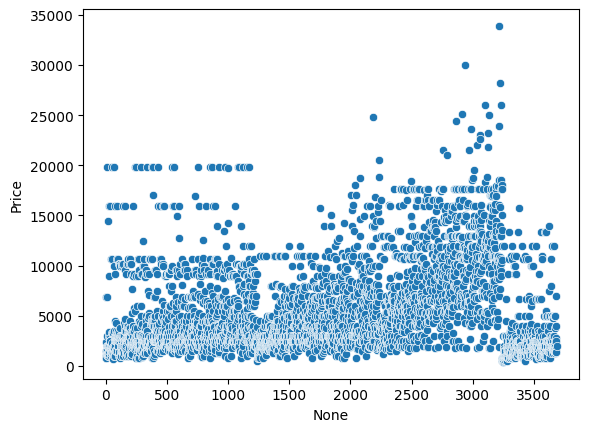

In [ ]:
sns.scatterplot(x = merged_df.index, y = merged_df['Price'])

특이 데이터 개수: 124


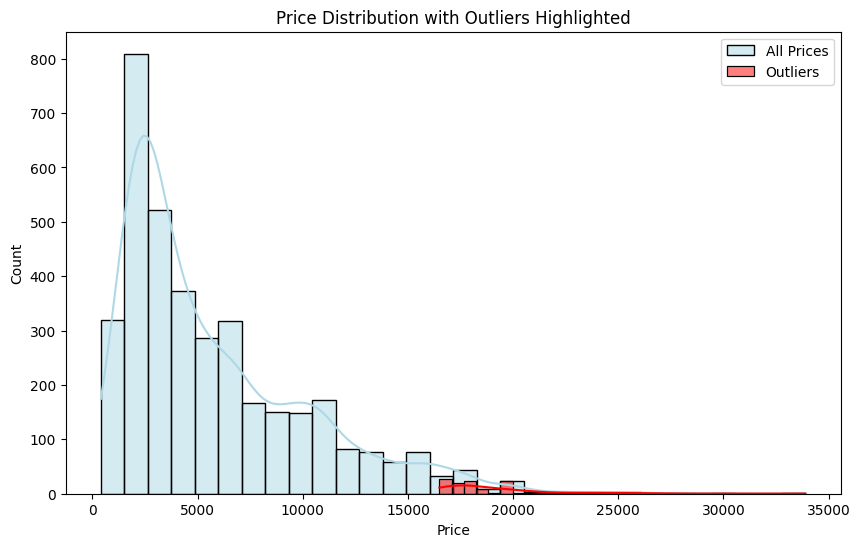

In [ ]:
# IQR 기반 이상치 탐지 함수
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Price 열의 이상치 데이터프레임
outliers_price = detect_outliers_iqr(cars_df, 'Price')

# 이상치 개수 확인 및 시각화
plt.figure(figsize=(10, 6))
sns.histplot(cars_df['Price'], bins=30, color="lightblue", label="All Prices", kde=True)
sns.histplot(outliers_price['Price'], bins=30, color="red", label="Outliers", kde=True)

# 개수 출력
print("특이 데이터 개수:", len(outliers_price))

# 그래프 설정
plt.title("Price Distribution with Outliers Highlighted")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()
plt.show()

#### Mileage(miles)
- 마일리지 수가 수백만 마일을 넘는 경우가 있을까?
  - 대부분의 자동차가 평균적으로 연간 12,000에서 15,000 마일(약 19,312에서 24,140 킬로미터) 정도를 주행한다고 함.
  - 또한, 10년 이상 사용한 차량이라면 120,000에서 150,000 마일(약 193,121에서 241,402 킬로미터) 사이의 주행 거리가 일반적인 것으로 미루어보아 이상치!

<Axes: xlabel='None', ylabel='Mileage(miles)'>

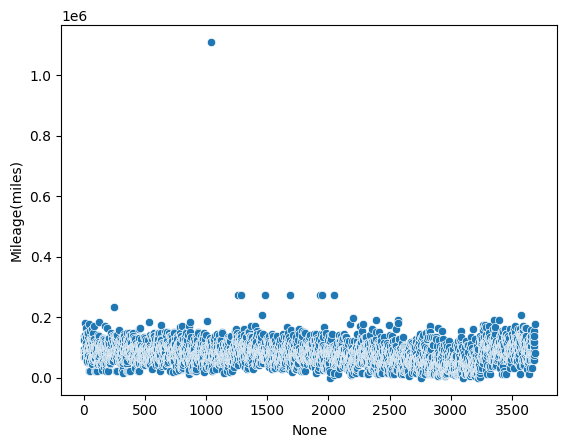

In [ ]:
sns.scatterplot(x = merged_df.index, y = merged_df['Mileage(miles)'])

In [ ]:
merged_df['Mileage(miles)'].max()

1110100

In [ ]:
# 1000000 이상 데이터 제거
merged_df = merged_df[merged_df['Mileage(miles)'] <= 1000000]

#### Registration_Year
- 크게 말이 되지 않는 등록 년수는 존재하지 않는 것으로 판단.

<Axes: xlabel='None', ylabel='Registration_Year'>

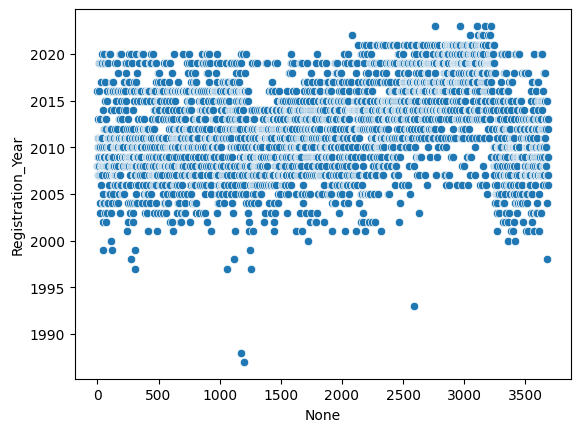

In [ ]:
sns.scatterplot(x = merged_df.index, y = merged_df['Registration_Year'])

#### Previous Owners
- 이 수치 역시 평균적 수치에 가까운 것으로 보여 별도 처리 안함.

<Axes: xlabel='None', ylabel='Previous Owners'>

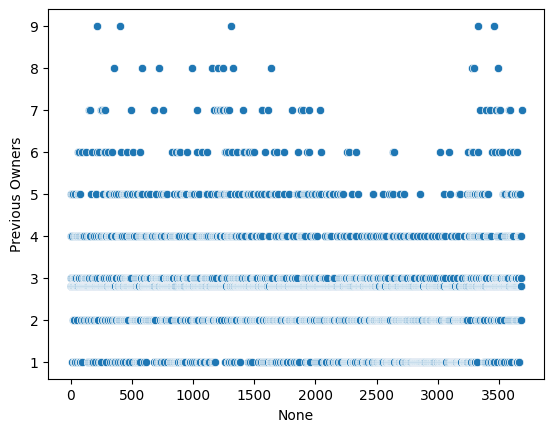

In [ ]:
sns.scatterplot(x = merged_df.index, y = merged_df['Previous Owners'])

#### Engine
- 엔진 용량 자체도 6L를 넘어서는 수치가 크게 이상치로 보이지는 않음.

<Axes: xlabel='None', ylabel='Engine'>

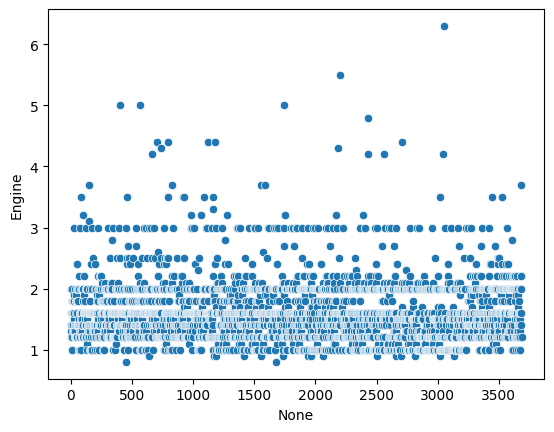

In [ ]:
sns.scatterplot(x = merged_df.index, y = merged_df['Engine'])

#### Doors
- 이 역시 문제되는 수준의 데이터는 없음.

<Axes: xlabel='None', ylabel='Doors'>

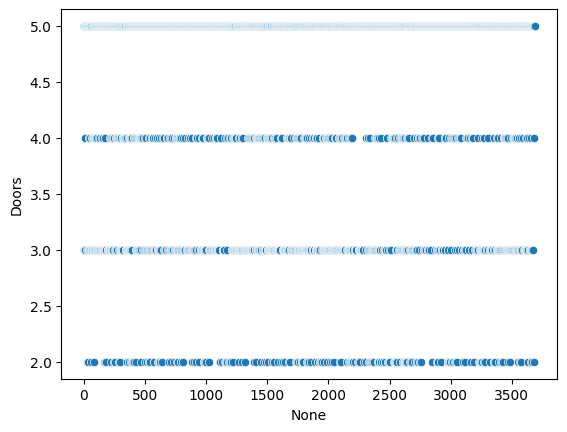

In [ ]:
sns.scatterplot(x = merged_df.index, y = merged_df['Doors'])

#### Seats
- 몇 인승인지에 따라서 시트 개수도 이상한 정도의 데이터는 없음.

<Axes: xlabel='None', ylabel='Seats'>

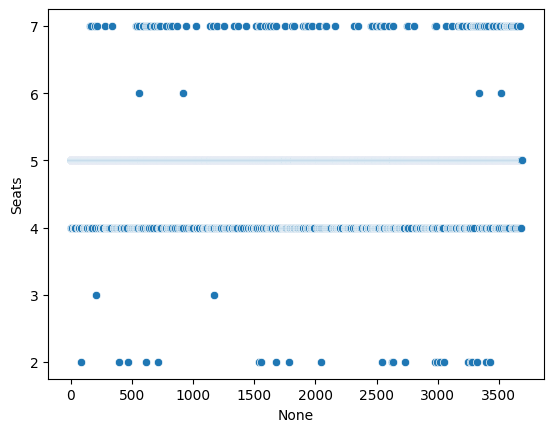

In [ ]:
sns.scatterplot(x = merged_df.index, y = merged_df['Seats'])

## 7. 스케일링
- 스케일링할 기법 선정
  - 데이터 결측치를 정규분포를 이용해 정리하고, 전체 데이터가 정규분포에 가까울 수 있도록 데이터를 변환했기 떄문에  **Standard Scaling**을 사용하는 것이 가장 용이할 것으로 보임.
  - 또한, 아웃라이어도 정리했기 때문에 스탠다드형으로 진행할 것.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 학습과 데이터 프레임 적용 동시 진행

scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_df.select_dtypes(include=['float64', 'int64']))
scaled_df = pd.DataFrame(scaled_features, columns=merged_df.select_dtypes(include=['float64', 'int64']).columns)

In [ ]:
# 확인
scaled_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats
0,0.245251,-0.309807,0.853301,0.159699,-0.418315,0.690602,0.17570
1,-0.951941,0.206621,-0.834855,0.982041,-0.830321,-1.337723,0.17570
2,-1.072879,1.565771,-0.201796,0.001445,-0.418315,0.690602,0.17570
3,-0.752594,0.435303,-0.412816,1.804383,-0.418315,-1.337723,-1.56291
4,-1.061582,0.105980,0.220243,0.001445,-0.624318,0.690602,0.17570


## 8. 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)

In [ ]:
from sklearn.decomposition import PCA

- PCA 학습을 하려던 도중, 결측치가 있어 학습이 안되는 문제 발생.
  - 기존에 결측치로 처리하지 않았던 `Engine`과 `Emission Class`의 결측치를 우선 제거하고 진행.

In [ ]:
# PCA 진행
pca = PCA(n_components=0.7)
pca_features = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_features)

In [ ]:
pca_df

,0,1,2
0,0.879743,0.488353,-0.389803
1,-1.408842,-0.870932,-1.092776
2,-1.179253,0.856640,-0.647616
3,-1.602621,-2.012528,-0.620321
4,-0.225490,0.558308,-1.039723
...,...,...,...
3587,-1.387393,0.505701,-0.813540
3588,-0.591344,0.217156,1.041228
3589,-1.080449,0.352128,0.898541
3590,-2.532958,1.272068,0.948475


## 마지막 추가 실습
- 국가별 총 브랜드 개수
- 상관관계가 높은 변수들이 있는지 확인
  - 이 경우, 위에서 사용한 숫자 데이터들의 상관행렬을 다시 한번 보여줄 예정.(데이터 스케일링과 PCA 추출을 했기 때문에 조금 다르지 않을까하는 추측에서!)

In [ ]:
# 1. 국가별 총 브랜드 개수 확인
brand_counts = brand_df['country'].value_counts()
brand_counts

,count
country,
Japan,11
United Kingdom,8
Germany,6
United States,5
South Korea,4
France,4
Italy,4
Sweden,2
Czech Republic,1


#### 숫자 데이터 증가
- 데이터 전처리 과정에서 숫자 데이터가 늘어남에 따라서 상관관계를 더 넓은 측면에서 다양하게 해볼 수 있게 되었음.
- 이는, 추후 모델에 데이터를 적용할 때에도 수치를 잘 반영하는 모델을 사용한다면 유의미한 수치를 더 잘 뽑을 수 있을 것으로 예상.

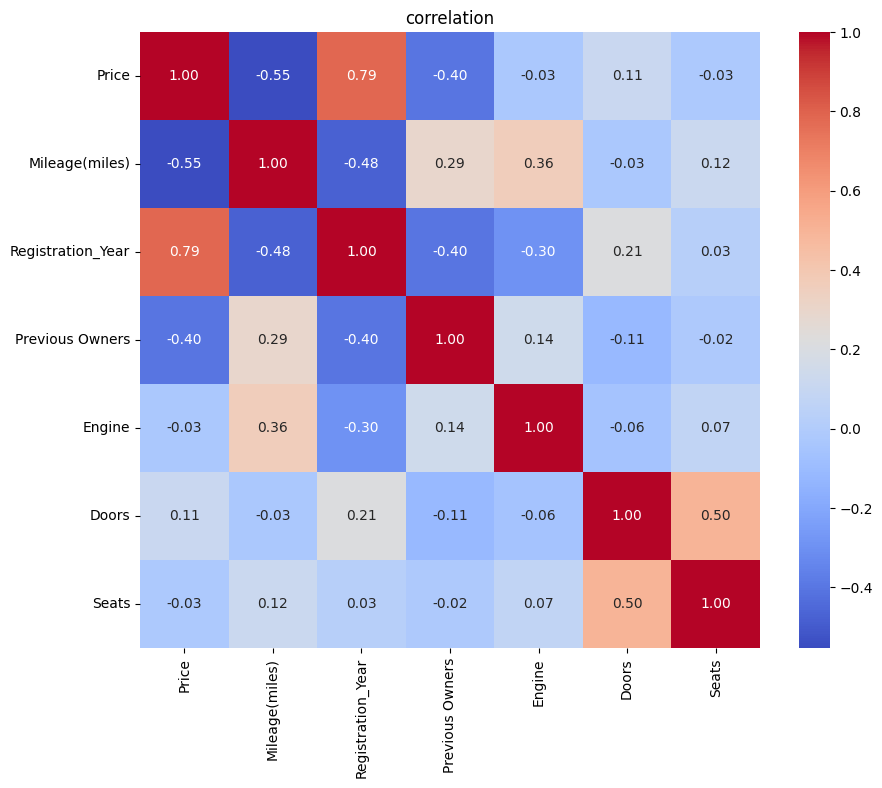

In [ ]:
# merged_df로 먼저 비교
import seaborn as sns
import matplotlib.pyplot as plt

## 수치형 변수들로 분석
numeric_merged_df = merged_df.select_dtypes(include='number')

## 수치형 변수들 간의 상관 행렬 계산
correlation_matrix = numeric_merged_df.corr()

## 상관 행렬을 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation')
plt.show()

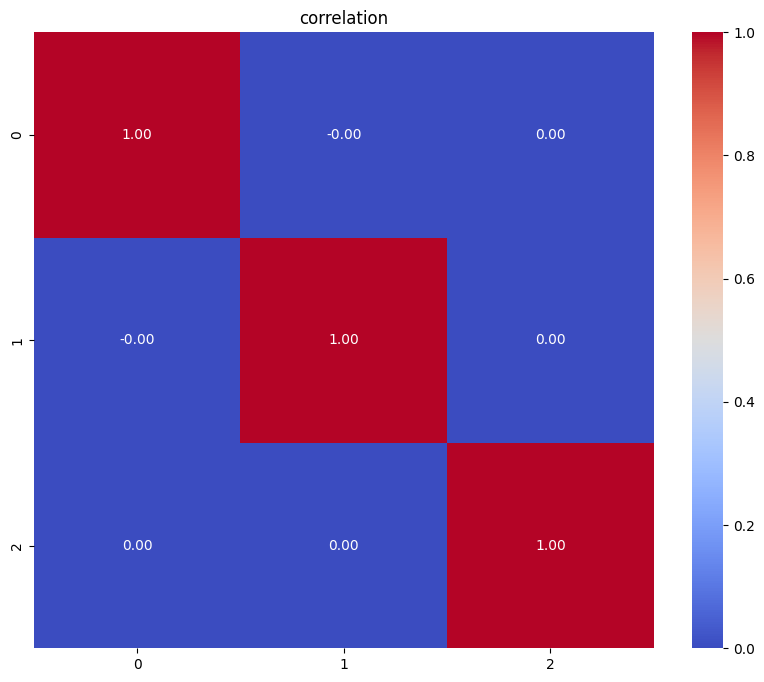

In [ ]:
# 2. 상관관계가 높은 변수들이 있는지 확인
import seaborn as sns
import matplotlib.pyplot as plt

## 수치형 변수들로 분석
numeric_pca_df = pca_df.select_dtypes(include='number')

## 수치형 변수들 간의 상관 행렬 계산
correlation_matrix = numeric_pca_df.corr()

## 상관 행렬을 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation')
plt.show()

## 9. 최종 데이터 csv로 저장
- 기존 merged_df 데이터
- PCA 추출 결과 데이터

In [ ]:
# merged_df
merged_df.to_csv('/content/drive/MyDrive/Colab Notebooks/1031data/merged_df.csv', index=False)

In [ ]:
# pca_df
pca_df.to_csv('/content/drive/MyDrive/Colab Notebooks/1031data/pca_df.csv', index=False)

## 추출한 데이터의 활용 방향
- 이 프로젝트의 초반에 언급한 "중고차 가격 예측 모델"에 사용할 데이터가 충분히 될 수 있을 것으로 예상됨.
- 또한, 차종별 구매 성향 분석 역시 클러스터링 작업을 해주면 직접적으로 사용 가능한 데이터로 만들 수 있을 것으로 예측.